# Question 3
## a

[[-1.22739142  0.40747737 -1.27707427 ... -1.67713512  0.08319069
   1.13400196]
 [-0.16356424  1.39077707  0.39448923 ... -0.81400355 -0.73286591
  -0.54023856]]


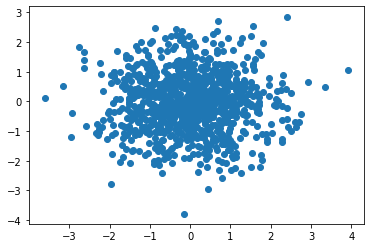

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(2, 1000)
print(X)
plt.scatter(X[0, :], X[1, :])
plt.show()

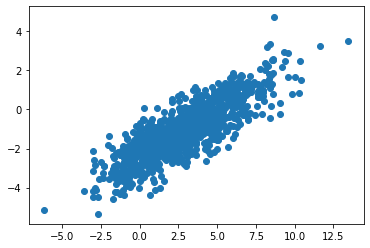

In [8]:
X = np.random.randn(2, 1000)
A = np.linalg.cholesky(np.array([[7, 3], [3, 2]]))
X = A @ X
for i in range(1000):
    X[0, i] += 3
    X[1, i] -= 1
plt.scatter(X[0, :], X[1, :])
plt.show()

## c

In [12]:
A = np.array([0, 1])
X2_mu = A @ np.array([[3], [-1]])
X2_var = A @ np.array([[7, 3], [3, 2]]) @ A.T
print("X2 ~ N({}, {})".format(X2_mu[0], X2_var))

X2 ~ N(-1, 2)


# Question 4
## a

In [42]:
M0 = np.array([[1], [0]])
M1 = np.array([[0], [2]])
S0 = np.array([[8, 3], [3, 2]])
S1 = np.array([[1, .1], [.1, 1]])
w = 2 * (np.linalg.inv(S0) @ M0 - np.linalg.inv(S1) @ M1)
c = np.log(np.linalg.det(S0)) - np.log(np.linalg.det(S1)) 
c = c + M0.T @ np.linalg.inv(S0) @ M0  - M1.T @ np.linalg.inv(S1) @ M1
B = np.linalg.inv(S1) - np.linalg.inv(S0)

## b

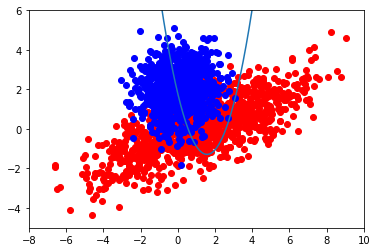

In [51]:
X_Y0 = np.random.randn(2, 1000)
A = np.linalg.cholesky(np.array([[8, 3], [3, 2]]))
X_Y0 = A @ X_Y0
for i in range(1000):
    X_Y0[0, i] += 1
    X_Y0[1, i] += 0

X_Y1 = np.random.randn(2, 1000)
A = np.linalg.cholesky(np.array([[1, .1], [.1, 1]]))
X_Y1 = A @ X_Y1
for i in range(1000):
    X_Y1[0, i] += 0
    X_Y1[1, i] += 2

x0 = np.linspace(-20, 20, 10000)
x1 = np.linspace(-20, 20, 10000)

boundary = np.zeros([10000,1])
for i in range(x1.shape[0]):
    x = np.array([x0[i], x1[i]])
    boundary[i] = (x.T@B@x + x.T@w - c)


plt.scatter(X_Y0[0, :], X_Y0[1, :], c="r")
plt.scatter(X_Y1[0, :], X_Y1[1, :], c="b")
plt.plot(x0, boundary)
plt.xlim((-8, 10))
plt.ylim((-5, 6))

plt.show()

## c

In [52]:
def MAP(x):
    if x.T @ w > c:
        return 0
    else:
        return 1

In [56]:
num_misclassified = 0
for i in range(1000):
    x = X_Y0[:, i]
    if MAP(x) != 0:
        num_misclassified += 1
for i in range(1000):
    x = X_Y1[:, i]
    if MAP(x) != 1:
        num_misclassified += 1
        
print("number of misclassification = ", num_misclassified)
print("empirical risk = ", num_misclassified / 2000)

number of misclassification =  364
empirical risk =  0.182
